In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr 

# Correlation improved

In [2]:

dfS461 = pd.read_csv("S461_rez_2.csv")
dfS461

,Method,Original_PCC,Original_RMSE,MBC(dd) PCC,MBC(dd) RMSE,MBC(Rose) PCC,MBC(Rose) RMSE
0,ESM-IF1,0.36,N.A.,0.49,1.25,0.47,1.22
1,Pythia_PDB,0.41,7.39,0.56,1.13,0.54,1.13
2,Pythia_AF,0.58,8.70,0.66,1.04,0.64,1.06
3,FoldX,0.21,2.03,0.38,1.44,0.39,1.37
4,Stability Oracle,0.64,1.18,0.63,1.19,0.64,1.17
5,DDGun3D,0.62,1.17,0.54,1.41,0.61,1.23
6,ddMBC_only,0.39,1.38,NaN,NaN,NaN,NaN
7,Rose*,0.38,NaN,NaN,NaN,NaN,NaN
8,KD*,0.35,NaN,NaN,NaN,NaN,NaN


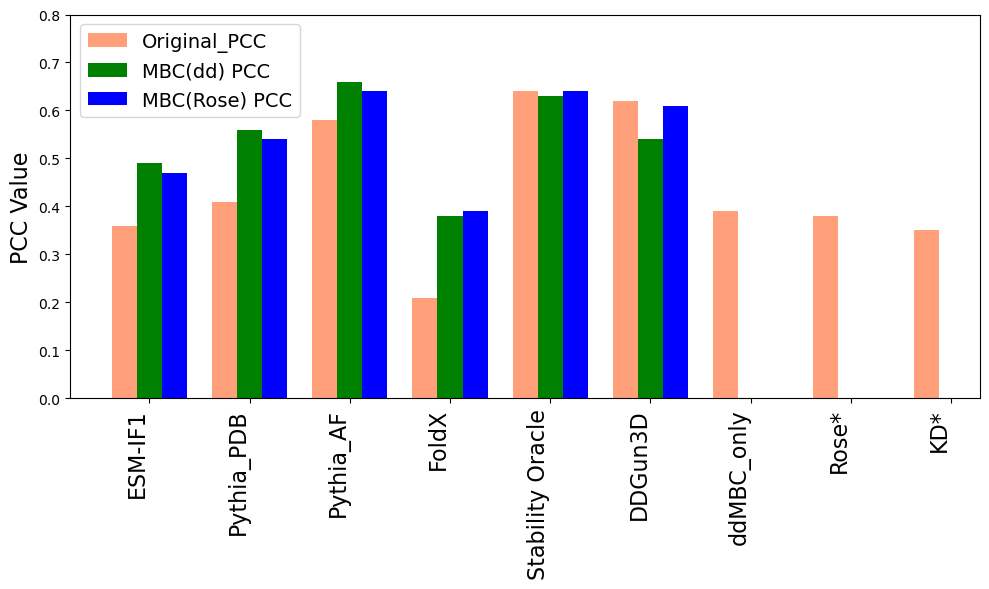

In [3]:

# Plotting
x = np.arange(len(dfS461["Method"]))  # Label locations
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Creating bars
rects1 = ax.bar(x - width, dfS461["Original_PCC"], width, label="Original_PCC", color='lightsalmon')
rects2 = ax.bar(x, dfS461["MBC(dd) PCC"], width, label="MBC(dd) PCC", color='green')
rects3 = ax.bar(x + width, dfS461["MBC(Rose) PCC"], width, label="MBC(Rose) PCC", color='blue')

# Formatting
#ax.set_xlabel("Methods with and without MBC correction", fontsize=16)
ax.set_ylabel("PCC Value", fontsize=16)
#ax.set_title("Comparison of PCC Values across Different Methods")
ax.set_xticks(x)
ax.set_xticklabels(dfS461["Method"], rotation=90, ha="right", fontsize=16)
ax.legend(fontsize=14)
ax.set_ylim(0, 0.8)

plt.savefig("pcc_bar_plot.png", dpi=300, bbox_inches="tight")

# Show plot
plt.tight_layout()
plt.show()

# Correlations among the coefficients

In [10]:
AA = "ACDEFGHIKLMNPQRSTVWY"

dfC = pd.read_csv("ddmbc_params_2.csv")
dfC = dfC[dfC["Parameter"] != "delta"]
dfC = dfC.drop("Parameter", axis=1)
dfC.corr()

,ESM-IF1,Pythia,FoldX,DDGun3D,StabilityOracle,ddmbc_aa_ridge,Rose1985,Kyte-Doolittle
ESM-IF1,1.000000,0.952355,0.554882,-0.519871,0.675367,0.941048,0.864905,0.546918
Pythia,0.952355,1.000000,0.449081,-0.583699,0.574001,0.879489,0.930942,0.423757
FoldX,0.554882,0.449081,1.000000,0.273730,0.383319,0.621426,0.379184,0.410784
DDGun3D,-0.519871,-0.583699,0.273730,1.000000,-0.404731,-0.472963,-0.664053,-0.161964
StabilityOracle,0.675367,0.574001,0.383319,-0.404731,1.000000,0.608141,0.537249,0.762569
ddmbc_aa_ridge,0.941048,0.879489,0.621426,-0.472963,0.608141,1.000000,0.852151,0.430521
Rose1985,0.864905,0.930942,0.379184,-0.664053,0.537249,0.852151,1.000000,0.270690
Kyte-Doolittle,0.546918,0.423757,0.410784,-0.161964,0.762569,0.430521,0.270690,1.000000


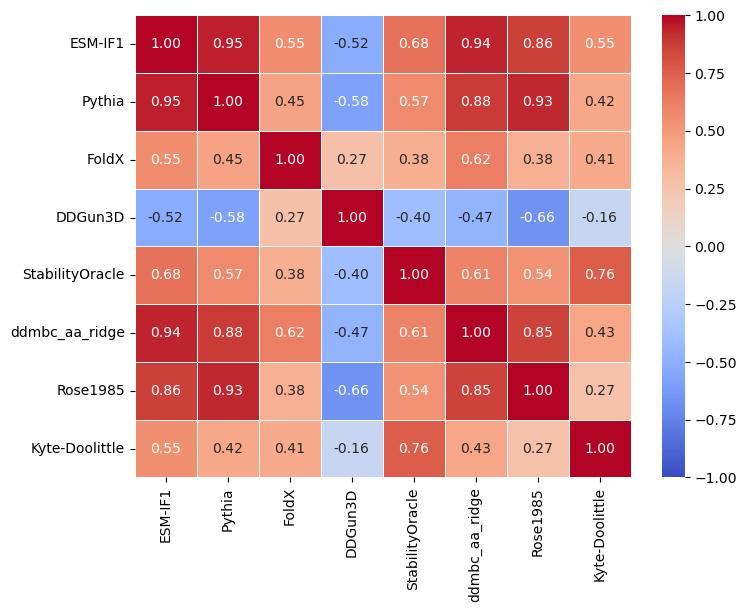

In [11]:


# Compute correlation matrix
corr_matrix = dfC.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Title
#plt.title("Correlation Heatmap", fontsize=14)
plt.savefig("Coeff_corr.png", dpi=300, bbox_inches="tight")
# Show plot
plt.show()

# More methods with Rose

In [6]:

dfNMI = pd.read_csv("test_rez.csv")
dfNMI

,Unnamed: 0,plain_pearson,test_pearson,delta_pearson,plain_RMSE,test_RMSE,delta_RMSE,type,mass_balance
0,pythia,0.425031,0.616999,0.191968,7.390213,1.216855,-6.173358,struct.PLM,n
1,mpnn_10_00,0.339341,0.521116,0.181775,2.514741,1.092440,1.422301,struct.PLM,n
2,FoldX,0.221282,0.398879,0.177597,2.229436,1.336322,0.893114,biophysical,n
3,mutcomputex,0.326215,0.500248,0.174033,1.387862,1.156582,0.231280,struct.PLM,n
4,tranception_weights,0.234860,0.407317,0.172457,1.675691,1.224142,0.451549,seq. PLM,n
5,tranception,0.236225,0.406511,0.170286,1.675464,1.224315,0.451149,seq. PLM,n
6,msa_transformer_mean,0.301652,0.467062,0.165410,5.835305,1.131992,4.703312,seq.PLM,n
7,msa_transformer_median,0.288604,0.453755,0.165152,5.953550,1.145814,4.807736,seq.PLM,n
8,mpnn_20_00,0.394938,0.550892,0.155954,2.362278,1.067560,1.294718,struct.PLM,n
9,mifst,0.364169,0.519735,0.155566,4.996811,1.095391,3.901420,struct.PLM,n


In [7]:
dval = {}
pvalb = {}
pvala = {}
for x in "yn":
    pvala[x] = dfNMI[dfNMI.mass_balance == x]["test_pearson"].to_numpy()
    pvalb[x] = dfNMI[dfNMI.mass_balance == x]["plain_pearson"].to_numpy()
    dval[x] = pvala[x]-pvalb[x]

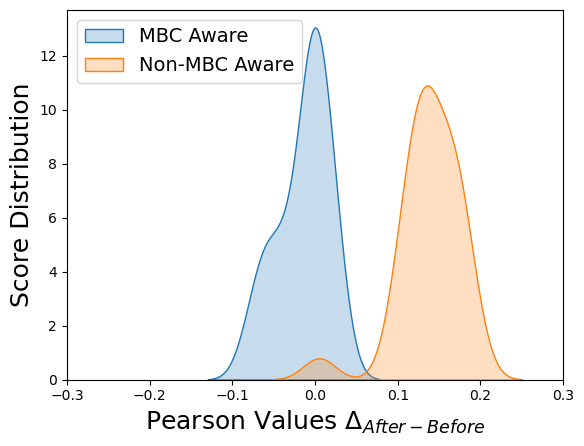

In [8]:

sns.kdeplot(data=pvala["y"]-pvalb["y"], label='MBC Aware', fill=True)
sns.kdeplot(data=pvala["n"]-pvalb["n"], label='Non-MBC Aware', fill=True)
#sns.kdeplot(data=vala["y"], label='After')


plt.xlim(-0.3, 0.3)
plt.ylabel("Score Distribution", fontsize=18)
plt.xlabel("Pearson Values $\Delta_{After-Before}$",fontsize=18)
plt.legend(fontsize=14, loc="upper left")
plt.savefig("NMI.png", dpi=300, bbox_inches="tight")
plt.show()

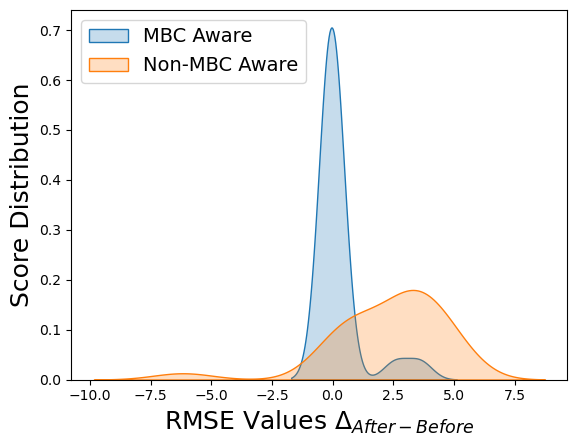

In [9]:
drmse = {}
for x in "yn":
    drmse[x] = dfNMI[dfNMI.mass_balance == x]["delta_RMSE"].to_numpy()

sns.kdeplot(data=drmse["y"], label='MBC Aware', fill=True)
sns.kdeplot(data=drmse["n"], label='Non-MBC Aware', fill=True)
#sns.kdeplot(data=vala["y"], label='After')


#plt.xlim(-0.3, 0.3)
plt.ylabel("Score Distribution", fontsize=18)
plt.xlabel("RMSE Values $\Delta_{After-Before}$",fontsize=18)
plt.legend(fontsize=14, loc="upper left")